In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('../../data/credit-a.csv',header = None)#默认第一行为表头，因为从第一行开始就是数据，所以需要把第一行改为不是表头

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [9]:
data.iloc[:,-1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

In [10]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1].replace(-1,0)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4,input_shape=(15,),activation = 'relu'))
model.add(tf.keras.layers.Dense(4,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [15]:
history = model.fit(x,y,epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 2ms/step - loss: 352.2467 - acc: 0.5452
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 296.1016 - acc: 0.5467
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 258.9217 - acc: 0.5513
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 227.6840 - acc: 0.5651
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 197.4400 - acc: 0.5207
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 173.5363 - acc: 0.3859
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 146.9303 - acc: 0.4640
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 113.3695 - acc: 0.3936
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 70.4994 - acc: 0.3890
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 27.9220 - acc: 0.4732
Epoch 11/100
21/21 [=====================

In [17]:
history.history.keys()

dict_keys(['loss', 'acc'])

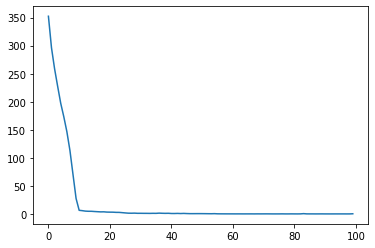

In [18]:
plt.plot(history.epoch,history.history.get('loss'))

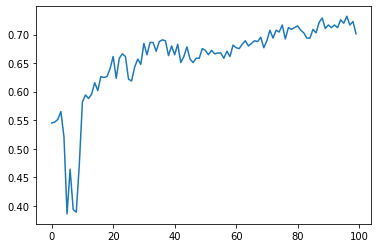

In [19]:
plt.plot(history.epoch,history.history.get('acc'))